In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from pathlib import Path
results_path = Path('/Users/leo/Documents/gpl/eop/poverty/replication/results')
figs_path = Path('/Users/leo/Documents/gpl/eop/poverty/replication/figs')
figs_path.mkdir(exist_ok=True)

In [11]:
def plot_x_vs_y(df, x_column, y_column, x_label, y_label, country):
    # Group by 'd' and iterate over each group
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)  # 2x2 grid for subplots
    for i, (d, group) in enumerate(df.groupby('d')):
        # Determine subplot index
        row = i // 2
        col = i % 2
        ax = axs[row, col]

        # Iterate over each method
        for method, method_group in group.groupby('method'):
            # Plot y_column against x_column
            ax.plot(method_group[x_column], method_group[y_column], label=method, marker="o")

        if x_column == "tolerance" and y_column == "post_transfer_poverty_rate":
            ax.plot(method_group[x_column], method_group[x_column], label="y=x", linestyle="dashed", color="black")

        # Add labels and title to each subplot
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(f'd={d}')
        ax.legend()

        # Add grid
        ax.grid(True)

    # Adjust layout and display plot
    plt.suptitle("{}: {} vs. {}".format(country, y_label, x_label))
    plt.tight_layout()
    plt.savefig(figs_path / "{}_{}_{}.pdf".format(country.lower(), x_column, y_column))
    plt.show()

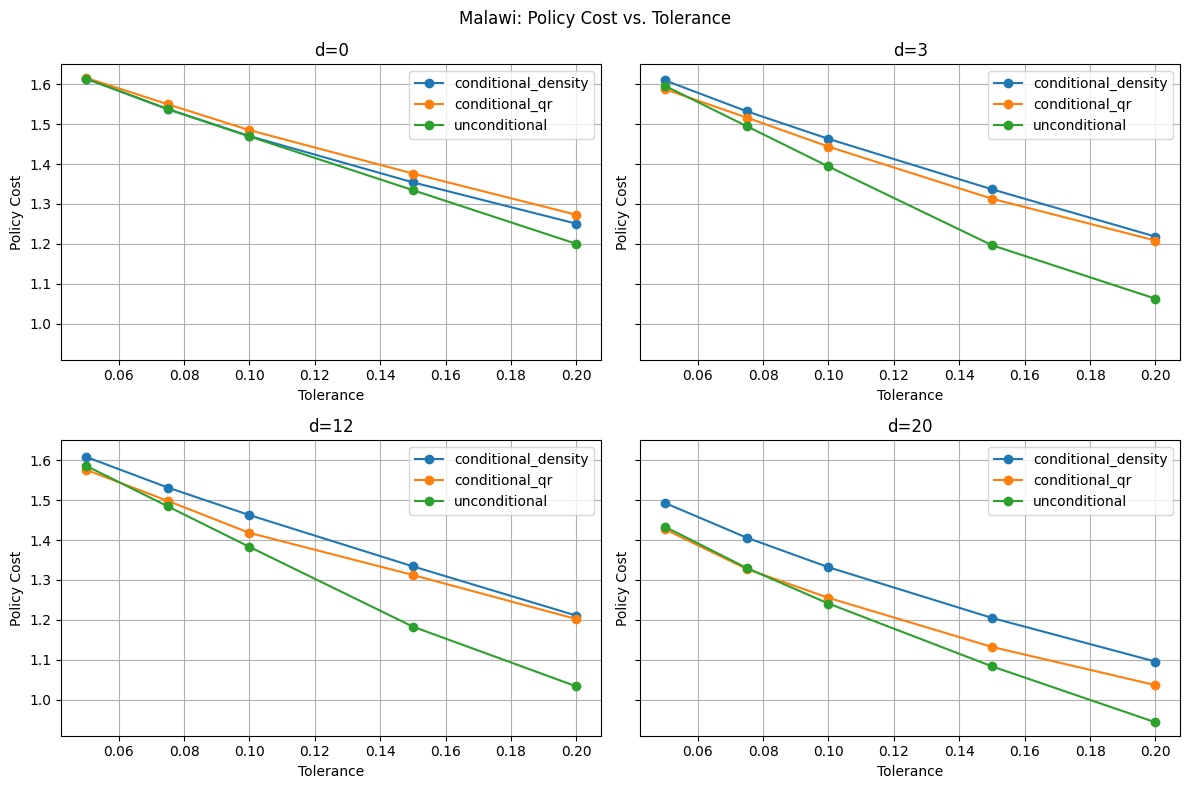

In [13]:
df = pd.read_csv(results_path / 'malawi.csv')
plot_x_vs_y(df, 'tolerance', 'policy_cost', 'Tolerance', 'Policy Cost', 'Malawi')

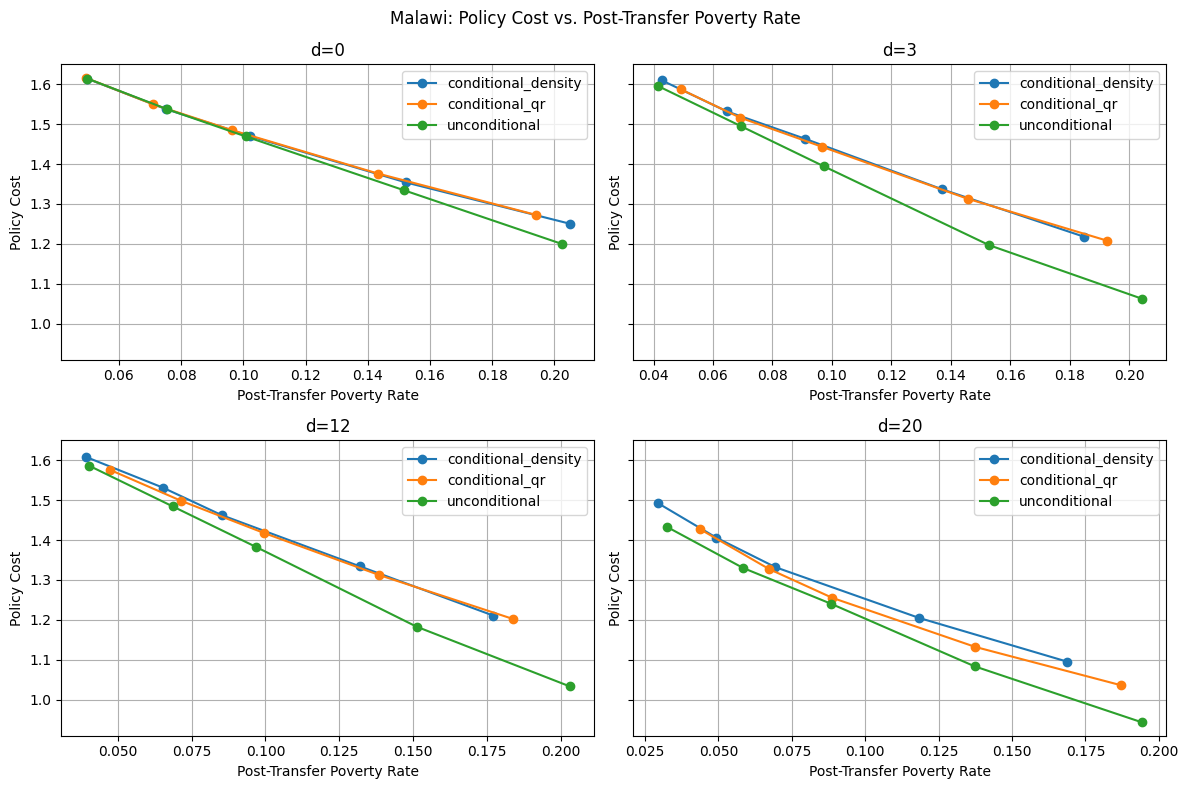

In [14]:
plot_x_vs_y(df, 'post_transfer_poverty_rate', 'policy_cost', 'Post-Transfer Poverty Rate', 'Policy Cost', 'Malawi')

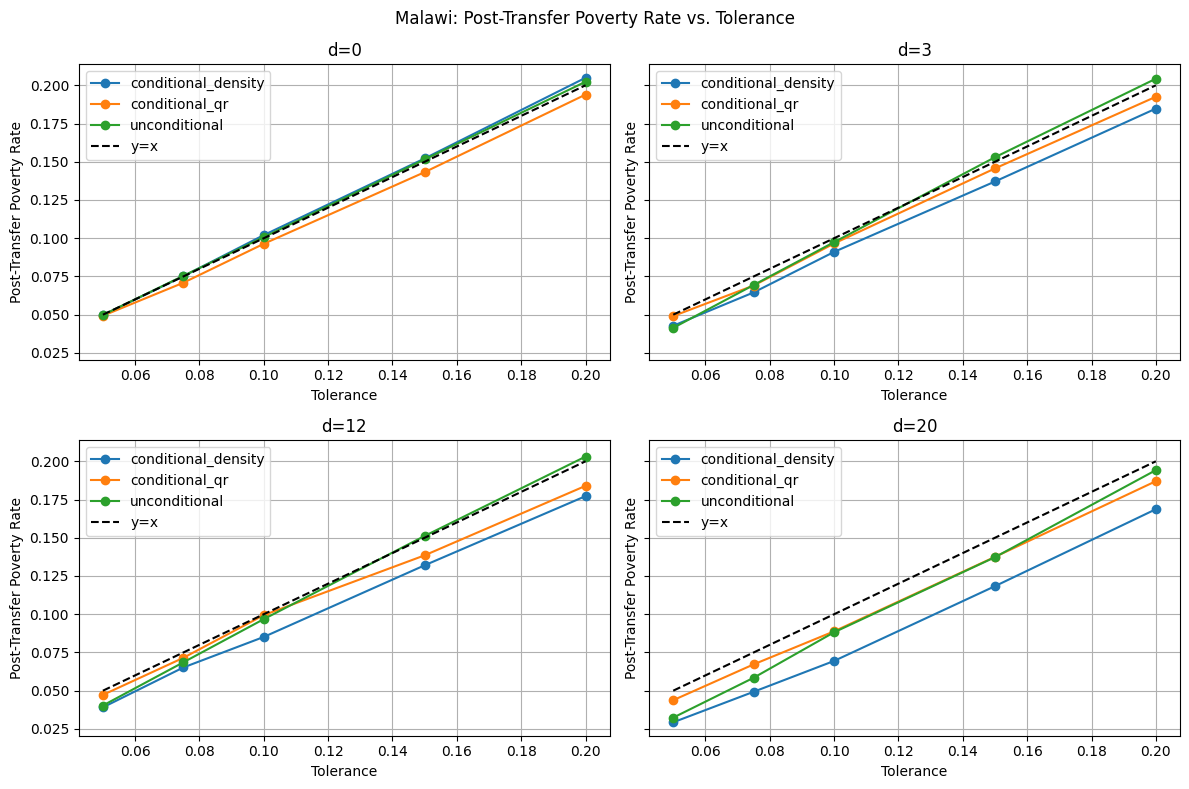

In [15]:
plot_x_vs_y(df, 'tolerance', 'post_transfer_poverty_rate', 'Tolerance', 'Post-Transfer Poverty Rate', 'Malawi')